<a href="https://colab.research.google.com/github/dhilligo/PHYS633S22/blob/main/Hilligoss_Dylan_09_Absorption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">09-Absorption</font>

We start by importing the modules
* Numpy -- operations on arrays and matrixes (and pi)
* Matplotlib pyplot -- plotting library
* Matplotlin patches -- module that enables patches in plots
* Astropy units -- defined quantities with units. We also import the CDS conversions

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 

from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable()

## 0. To execute: Below is a little function that created a gradiant of color between two curves, according to a certain function.

In [ ]:
def rect(ax,x,y,w,h,c):
    #ax = plt.gca()
    polygon = plt.Rectangle((x,y),w,h,color=c)
    ax.add_patch(polygon)

def rainbow_fill_between(ax, X, Y1, Y2, colors=None, 
                         cmap=plt.get_cmap("Reds"),**kwargs):
    plt.plot(X,Y1,lw=0)  # Plot so the axes scale correctly

    dx = X[1]-X[0]
    N  = X.size

    #Pad a float or int to same size as x
    if (type(Y2) is float or type(Y2) is int):
        Y2 = np.array([Y2]*N)

    #No colors -- specify linear
    if colors is None:
        colors = []
        for n in range(N):
            colors.append(cmap(n/float(N)))
    #Varying only in x
    elif len(colors.shape) is 1:
        colors = cmap((colors-colors.min())
                      /(colors.max()-colors.min()))
    #Varying only in x and y
    else:
        cnp = np.array(colors)
        colors = np.empty([colors.shape[0],colors.shape[1],4])
        for i in range(colors.shape[0]):
            for j in range(colors.shape[1]):
                colors[i,j,:] = cmap((cnp[i,j]-cnp[:,:].min())
                                    /(cnp[:,:].max()-cnp[:,:].min()))

    colors = np.array(colors)

    #Create the patch objects
    for (color,x,y1,y2) in zip(colors,X,Y1,Y2):
        rect(ax,x,y2,dx,y1-y2,color,**kwargs)

## 1. In class: Imagine an ray of light entering a slab of constant density and opacity. 

* The lenght of the slab ($d$) is 4 length units. 
* The product of the opacity and the density give a fraction of $\kappa\rho$ = 0.25 per unit of length. 

### a. Find and plot the intensity as the ray crosses the slab.

> **TODO** <font color='red'>: Starting from the $dI_\lambda$ equation, derive the equation for $I(s)$ for a constant density and opacity. Show your work here. Add a curve of $I(s)$ to the plot in the code below.</font>


### b. Find and plot the optical depth everywhere in the slab.

> **TODO** <font color='red'>: Integrate the equation for $d\tau$ to find $\tau(s)$. Show your work here. Add a curve of $\tau(s)$ to the plot in the code below.  </font>

<img src="https://github.com/dhilligo/PHYS633S22/blob/main/Calculations/IMG_0478.jpeg?raw=true" width="500"> 

<br>
<br>
<font color="red">Don't forget to add axis labels and legends to your plots</font>

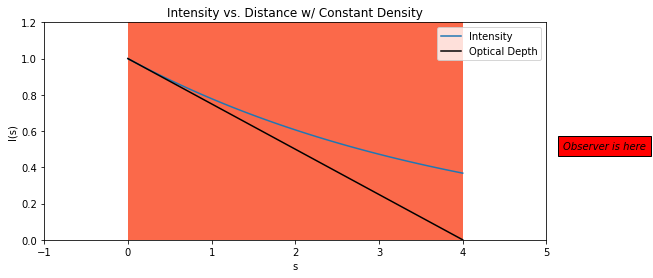

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(9,4))
ax.set_ylim(0, 1.2)
ax.set_xlim(-1,5)

# For the first graph, I want a patch with constant color
cmap = plt.cm.get_cmap('Reds') # get a red scale color map
rgba = cmap(0.5) # pick the color in the center of the color map
rec = mpatches.Rectangle( (0, 0), 4 , 1.2, fc=rgba) # Create a shaded rectangle
ax.add_patch(rec) # add the rectangle to the plot
ax.text(5.2, 0.5, 'Observer is here', style='italic',
        bbox={'facecolor':'red', 'pad':5})


#---------------------------------------
# a. Intensity
I0=1
kappa_rho=0.25
dist=4

sarray=np.linspace(0,dist,100)

intensity=I0*np.exp(-1*kappa_rho*(sarray-0))

ax.plot(sarray,intensity,label='Intensity')



#---------------------------------------
# b. optical depth

tau=-1*kappa_rho*(sarray-dist)

ax.plot(sarray,tau,color='black',label='Optical Depth')



#--------------------------
# For a legend, add label='text' to the ax.plot command
# for which you would like a legend entry, and uncomment
# the following line:
ax.set_xlabel("s")
ax.set_ylabel("I(s)")
ax.set_title("Intensity vs. Distance w/ Constant Density")
ax.legend(loc=0)

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

***ANSWER***: This plot is showing us how intensity varies with distance for an absorbing slab with constant density. Both the intensity and optical depth fall to zero as you move away from the starting point. However, the intensity falls off quicker than the optical depth. This constant density causes the intensity to drop of linearly (at a aconstant rate). As for the optical depth, it has not had time to reach zero by the edge of the slab, but it has reached zero by the time it reaches the tip of the nose of the observer.

## 2. At home: Imagine now that the density in the slab changes such that:

$$ \rho(s) = \rho_o \left( 1- \frac{s}{d} \right), $$ where $d$ is the length of the slab.

> **TODO**:
>
> a. Find an expression for $I(s)$ is the density changed as above and if the opacity remains constant. Make your integral unit-less before integrating. Show your work here. 

> b. Analytically, find what the value of $\rho_o \kappa$ has to be for the final intensity to be the same as that of #1. Show your work here

> c. In the graph below, plot the intensity as a function of position. 

> d. Find an expression for the optical depth everywhere in the slab. Make your integral unit-less before integrating. Show your work here. 

> e. In the graph below, add a curve for $\tau(s)$.

<img src="https://github.com/dhilligo/PHYS633S22/blob/main/Calculations/IMG_0479.jpeg?raw=true" width="500"> 
<img src="https://github.com/dhilligo/PHYS633S22/blob/main/Calculations/IMG_0480.jpeg?raw=true" width="500"> 

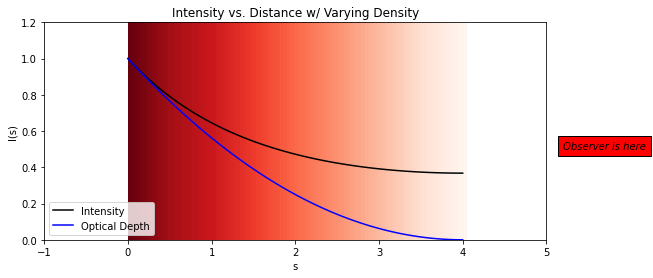

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(9,4))

ax.set_ylim(0, 1.2)
ax.set_xlim(-1,5)

# Create a patch with a gradient to illustrate
# the change in density
X=np.linspace(0,4,100)
Y1=np.copy(X)*0
Y2=np.copy(X)*0+4
g = 1.0-np.copy(X/4)
rainbow_fill_between(ax,X,Y1,Y2,colors=g)
ax.text(5.2, 0.5, 'Observer is here', style='italic',
        bbox={'facecolor':'red', 'pad':5})

#---------------------------------------
#---------------------------------------
# At home
dist1=4
kappa_rho1=-0.5
sarray1=np.linspace(0,dist1,100)
intensity1=I0*np.exp(-kappa_rho1*(((sarray1-0)*(sarray1+0-2*dist1))/(2*dist1)))
ax.plot(sarray1,intensity1,label='Intensity',color='black')

tau1=-kappa_rho1*(((sarray1-dist1)*(sarray1+dist1-(2*dist1)))/(2*dist1))
ax.plot(sarray1,tau1,label='Optical Depth',color='blue')
ax.set_xlabel('s')
ax.set_ylabel('I(s)')
ax.set_title("Intensity vs. Distance w/ Varying Density")
#--------------------------
ax.legend(loc=0)

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

***ANSWER***: In this plot, I show intensity vs. distance but this time for a non-constant slab density. Similarly to the previous plot, both the intensity and optical depth decrease as the density varies. Only this time, intensity does not have the constant, linearly decreasing shape. This time it drops off slower since the density decreases as a function of distance. This means that light has less and less material to work through as it gets closer to the edge. This prevents the intensity from fully going to zero. For the optical depth with a decreasing density, it now can reach zero by the end of the slab and will remain such through the vacuum of space to the end of the observer's nose. 

## 3. Reading assignement: "what can we measure about stars" -- part 4

In this graduate course, we are making an advanced physical and mathematical model of star. 

But it is still good to learn and/or remind ourselves about which physical characteristics of stars we can actually measure. You might have covered some of this in some details in previous physics or astro courses (at UD PHYS 133, 144, 333, or 469) -- but it is still a good idea to have a quick look at the suggested reading below before crafting your paragraph. 

One other thing that can be measured is the **mass** of a star.

> **TODO**: <font color='red'>Have a look at section 18.2 Measuring Stellar Masses of the Open Stack Astronomy online [textbook](https://openstax.org/books/astronomy/pages/5-2-the-electromagnetic-spectrum), and write a short conceptual paragraph about how astronomer can determine the masses of stars. </font>

***ANSWER***: Perhaps the most fundamental property of a star is it's mass. All other properties of the star, including temperature, radius, etc., can be derived from this value. That is why it is so important to be able to accurately determinee its mass. 

There are multiple ways to do this. If you know that the star is a member of a binary system, you an find the mass by knowing the distance and the period then using the relationship: $D^3=(M_1+M_2)P^2$, a variation of Kepler's 3rd Law. This will allow you to find the total mass of the binary system relative to the Sun. To then find the individual stellar masses, you would need to know their velocities and the orbit's orientation relative to our line of sight.

Another way to find a star's mass is through its luminosity. If you know a star's luminosity, you can deduce its mass using the "Mass-Luminosity Relationship." This "ML" Relationship is defined as $L \sim M^{3.9}$.

These are two ways to find the mass of a star or star system.